<a href="https://colab.research.google.com/github/Masei25/Random-Forest-Classifier---Banknote-Authenticity/blob/master/BigDataRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#here we import the libraries
import pandas as pd
import sklearn as sk
import numpy as np
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#here we import the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bill_check.csv')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
#after checking the dataset we observed that in the 'Skewness' column
#some value were inputted as string instead of float.
#I convert the strings to float here
data['Skewness'] = abs(data['Skewness'].astype('string', copy=True).astype('float'))

In [5]:
# Here we save the label in variable y 
# Labels are the values we want to predict
y = data['Class']

#Here we save the features in variable x
# Remove the labels from the features
# axis 1 refers to the columns
X =  data.drop('Class', axis=1) 

# Saving feature names for later use
feature_list = list(X.columns)

In [6]:
#import sklearn
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Random forest for classification

# Instantiate model 
model_rfc = RandomForestClassifier(n_estimators= 20, random_state=0)

# Train the model on training data
model_rfc.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = model_rfc.predict(X_test)

In [12]:
import math
from numpy import mean
from numpy import std

In [13]:
# evaluate the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_rfc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.988 (0.011)


# **Variable Importance**

In [14]:
# Get numerical feature importances
importances = list(model_rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Variance             Importance: 0.61
Variable: Curtosis             Importance: 0.18
Variable: Skewness             Importance: 0.15
Variable: Entropy              Importance: 0.06


## **Visualization**

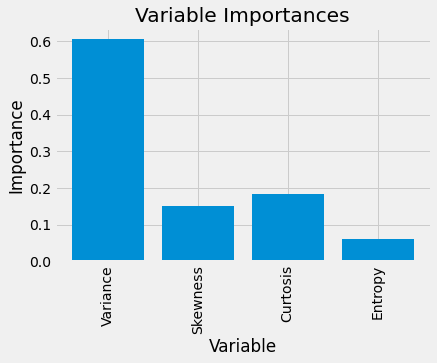

In [15]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [16]:
# Extract single tree
estimator = model_rfc.estimators_[5]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

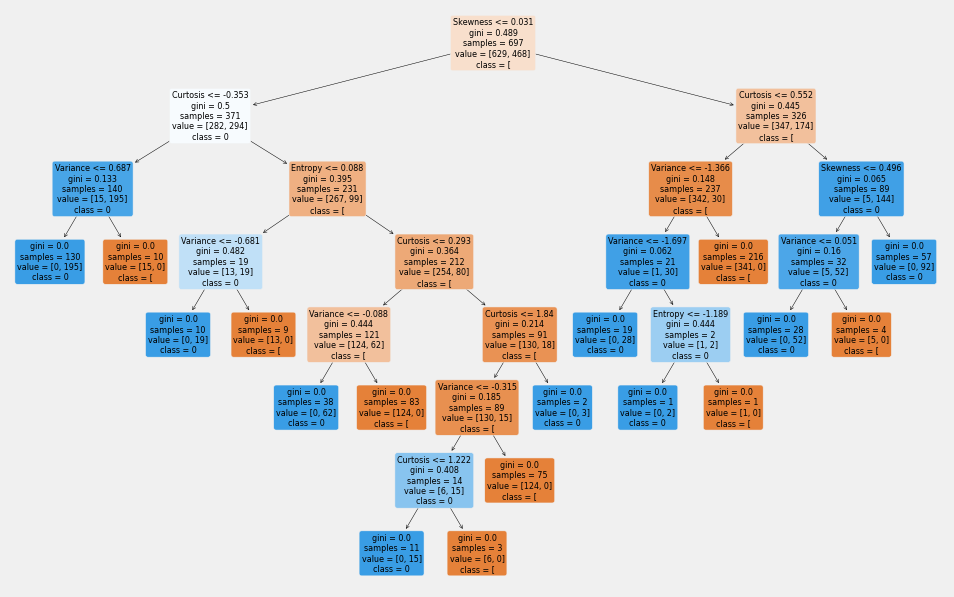

In [17]:
from sklearn.tree import plot_tree
from google.colab import files

fig = plt.figure(figsize=(15, 10))
plot_tree(estimator, 
          feature_names=X.columns,
          class_names=str(data['Class'].unique()), 
          filled=True, rounded=True)
fig.savefig("myplot.png")
files.download('myplot.png')
plt.show()

In [18]:
display(data.dtypes)

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)

In [20]:
# Evaluation on Training set
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [21]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.9852941176470589
